In [1]:
# 270pg
import pandas as pd
import numpy as np
string_data = pd.Series(['a', 'b', np.nan, 'd'])

In [2]:
string_data.isnull()  # null data 찾기

0    False
1    False
2     True
3    False
dtype: bool

In [3]:
# 271pg
data = pd. Series([1, np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [4]:
data.dropna()  # na값 제거하기 -> drop. NA값이 하나라도 있는 로우 제외

0    1.0
2    3.5
4    7.0
dtype: float64

In [8]:
from numpy import nan as NA
data = pd.DataFrame([[1, 6.5, 3], [1, NA, NA], [NA, NA, NA], [NA, 6.5, 3]])
cleaned_data1 = data.dropna()
cleaned_data1
cleaned_data2 = data.dropna(how= 'all')  # 모두 NA값인 로우만 제외
cleaned_data2

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [15]:
data = pd.DataFrame([[1, 6.5, 3], [1, NA, NA], [NA, NA, NA], [NA, 6.5, 3]])
data[4] = NA
cleaned_data3 = data.dropna(axis=1, how='all')
cleaned_data3

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [16]:
# 273pg
# threshold(문턱값) -> 1. 사람이 지정값 / 2. 경향에 따른 제시값

In [17]:
# 274pg
df2 = df.fillna(0)
df2
df.fillna(0, inplace= True)

NameError: name 'df' is not defined

In [18]:
# 277pg
dic_data = {'k1':['one', 'two', 'one', 'two', 'one', 'two', 'two'],
           'k2':[1, 1, 2, 3, 3, 4, 4]}
data = pd.DataFrame(dic_data)
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [20]:
data.duplicated()  # 마지막에 중복이 있음

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [22]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [24]:
data['v1'] = [0, 1, 2, 3, 4, 5, 6]
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [25]:
data.drop_duplicates(['k1', 'k2'], keep= 'last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [26]:
# 284pg
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [27]:
bins = [18, 25, 35, 60, 100]

In [28]:
cats = pd.cut(ages, bins) # categorize
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [29]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [31]:
# 298pg 정규표현식
import re
text = 'foo bar\t baz \tqux'
print(text)

foo bar	 baz 	qux


In [32]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [43]:
text = '''Dave dave@google.com
Steve steve@google.com
Rob rob@google.com
Ryan ryan@google.com
'''
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+.[A-Z]{2,4}'  # 이메일에서 사용 할 법한 기호 나열
re1 = re.compile(pattern, flags=re.IGNORECASE) # 대소문자 상관 없음.

In [44]:
re1.findall(text)

['dave@google.com', 'steve@google.com', 'rob@google.com', 'ryan@google.com']

In [46]:
# 309pg
data = pd.Series(np.random.randn(9),
                index= ['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'])
data

a   -1.221251
a    2.823368
a    0.661778
b    0.441490
b    0.011924
c    0.602421
c   -0.423172
d    0.456465
d    1.459079
dtype: float64

In [47]:
data = pd.Series(np.random.randn(9),
                index= [['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 2, 1, 2, 1, 2]])
data

a  1    1.521296
   2   -0.645814
   3   -1.301732
b  1   -1.615648
   2    0.785841
c  1   -1.919153
   2    0.779795
d  1   -0.425673
   2   -0.551699
dtype: float64

In [48]:
data['b']

1   -1.615648
2    0.785841
dtype: float64

In [49]:
data.loc[['b', 'd']] # 같은 level 선택

b  1   -1.615648
   2    0.785841
d  1   -0.425673
   2   -0.551699
dtype: float64

In [52]:
data.loc['b', 2]   # 다른 level 선택 -> b-2 선택

0.7858406609768632

In [59]:
df1 = pd.DataFrame({'key':['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1':[0, 1, 2, 3, 4, 5, 6]})
df2 = pd.DataFrame({'key':['a', 'b', 'd'], 'data2':[0, 1, 2]})

In [60]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [61]:
pd.merge(df1, df2, on= 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [62]:
df3 = pd.DataFrame({'l_key':['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1':[0, 1, 2, 3, 4, 5, 6]})
df4 = pd.DataFrame({'r_key':['a', 'b', 'd'], 'data2':[0, 1, 2]})

In [63]:
pd.merge(df3, df4, left_on= 'l_key', right_on= 'r_key')

,l_key,data1,r_key,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [64]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [67]:
np.concatenate([arr, arr], axis= 0) # 행 방향

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [66]:
np.concatenate([arr, arr], axis= 1) # 열 방향

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [68]:
s1 = pd.Series([0, 1], index= ['a', 'b'])
s2 = pd.Series([2, 3, 4], index= ['c', 'd', 'e'])
s3 = pd.Series([5, 6], index= ['f', 'g'])
print(s1); print(s2); print(s3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64


In [69]:
pd.concat([s1, s2, s3]) # 행 방향으로 붙여넣기

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [70]:
pd.concat([s1, s2, s3], axis= 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [71]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns= ['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns= ['b', 'd', 'a'])

In [72]:
pd.concat([df1, df2])

,a,b,c,d
0,0.498299,-1.309989,0.450241,-1.501706
1,0.353356,1.768731,1.266898,0.952557
2,-1.169425,-1.020400,1.219481,1.344748
0,0.001328,1.135815,NaN,-1.224740
1,0.523925,0.944751,NaN,0.406826


In [73]:
pd.concat([df1, df2], ignore_index= True)

,a,b,c,d
0,0.498299,-1.309989,0.450241,-1.501706
1,0.353356,1.768731,1.266898,0.952557
2,-1.169425,-1.020400,1.219481,1.344748
3,0.001328,1.135815,NaN,-1.224740
4,0.523925,0.944751,NaN,0.406826


In [74]:
# 464pg 시계열
rng = pd.date_range('2000-01-01', periods= 12, freq= 'T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [75]:
ts = pd.Series(np.arange(12), index= rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [76]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [78]:
ts.resample('5min', closed='right').mean()  # monitoring purpose

1999-12-31 23:55:00     0
2000-01-01 00:00:00     3
2000-01-01 00:05:00     8
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [80]:
frame = pd.DataFrame(np.random.randn(2, 4),
                    index = pd.date_range('1/1/2000', periods= 2, freq= 'W-WED'),
                    columns= ['a', 'b', 'c', 'd'])
frame

,a,b,c,d
2000-01-05,0.03411,1.592827,-1.514571,1.270052
2000-01-12,1.20316,-0.693242,0.603892,0.428138


In [81]:
df_daily = frame.resample('D').asfreq()
df_daily

,a,b,c,d
2000-01-05,0.03411,1.592827,-1.514571,1.270052
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.20316,-0.693242,0.603892,0.428138


In [83]:
df_daily.interpolate(method= 'values')

,a,b,c,d
2000-01-05,0.034110,1.592827,-1.514571,1.270052
2000-01-06,0.201117,1.266246,-1.211933,1.149779
2000-01-07,0.368124,0.939664,-0.909296,1.029505
2000-01-08,0.535131,0.613083,-0.606658,0.909232
2000-01-09,0.702139,0.286502,-0.304021,0.788958
2000-01-10,0.869146,-0.040079,-0.001383,0.668685
2000-01-11,1.036153,-0.366660,0.301254,0.548411
2000-01-12,1.203160,-0.693242,0.603892,0.428138


In [87]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates= True, index_col= 0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

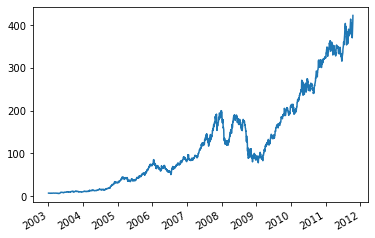

In [88]:
close_px.AAPL.plot()

<AxesSubplot:>

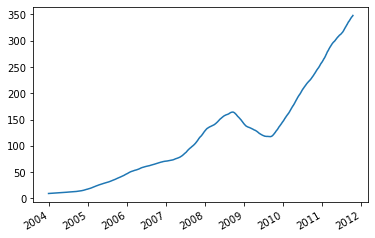

In [89]:
close_px.AAPL.rolling(250).mean().plot()

<AxesSubplot:>

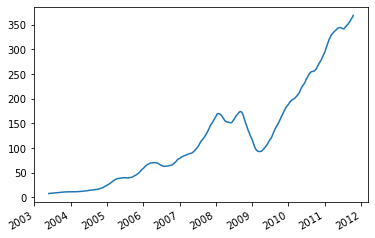

In [90]:
close_px.AAPL.rolling(100).mean().plot()

<AxesSubplot:>

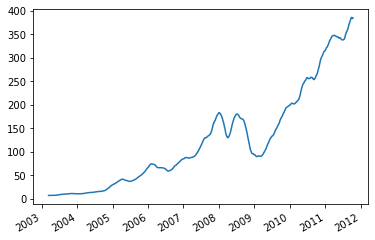

In [91]:
close_px.AAPL.rolling(50).mean().plot()

In [92]:
# 534pg 예제
path = 'datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [94]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path, 'rt', encoding= 'UTF-8')]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [95]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [96]:
def get_counts(seq):
    counts= {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [97]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [98]:
len(time_zones)

3440

In [99]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [100]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [101]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [102]:
import seaborn as sns

<AxesSubplot:>

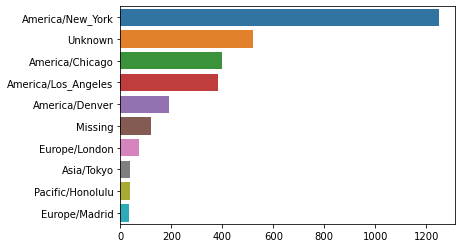

In [103]:
subset = tz_counts[:10]
sns.barplot(y= subset.index, x= subset.values)